In [ ]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/ My Drive/Colab Notebooks/Data Science/Ebay_Sales.csv')

In [ ]:
df.head()

,biddable,sold,startprice,saleprice,condition,size,heel,style,color,material,snippit,description
0,1,0,199.00,NaN,Pre-owned,9.5,Low,Open Toe,Black,Suede,Had soles re- covered.,Very good condition. Heel height very manageab...
1,0,0,375.00,NaN,New with box,7.5,High,Slingback,Other/Missing,Satin,NaN,"From my own personal collection, great conditi..."
2,1,1,299.99,780.0,Pre-owned,8.5,High,Pump,Black,Other/Missing,NaN,With its staggering half-foot-high heel and ch...
3,1,1,49.99,561.0,Pre-owned,8.5,High,Pump,Black,Snakeskin,NaN,"Comes w/ box, dustbag, and extra heel in its o..."
4,0,0,89.00,NaN,Pre-owned,5.5,Flat,Other/Missing,Other/Missing,Leather,NaN,Please ask questions before bidding. \n \nThis...


In [ ]:
df.shape

(3796, 12)

In [ ]:
df.describe()

,biddable,sold,startprice,saleprice,size
count,3796.000000,3796.000000,3796.000000,799.000000,3728.000000
mean,0.591149,0.210485,472.273538,372.735883,7.932940
std,0.491687,0.407707,314.227908,264.793373,1.538587
min,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,279.990000,199.990000,7.000000
50%,1.000000,0.000000,449.000000,325.000000,8.000000
75%,1.000000,0.000000,600.000000,499.990000,9.000000
max,1.000000,1.000000,4500.000000,3995.000000,12.000000


In [ ]:
df.dtypes

biddable         int64
sold             int64
startprice     float64
saleprice      float64
condition       object
size           float64
heel            object
style           object
color           object
material        object
snippit         object
description     object
dtype: object

In [ ]:
df.isnull().sum()

biddable          0
sold              0
startprice        0
saleprice      2997
condition         0
size             68
heel            961
style             0
color             0
material          0
snippit        3035
description      85
dtype: int64

dropping saleprice anf snippit as it has NAN more than 60% of data. Also dropping description

In [ ]:
df.drop(['saleprice','snippit','description'],axis=1, inplace=True)
df.head()

,biddable,sold,startprice,condition,size,heel,style,color,material
0,1,0,199.00,Pre-owned,9.5,Low,Open Toe,Black,Suede
1,0,0,375.00,New with box,7.5,High,Slingback,Other/Missing,Satin
2,1,1,299.99,Pre-owned,8.5,High,Pump,Black,Other/Missing
3,1,1,49.99,Pre-owned,8.5,High,Pump,Black,Snakeskin
4,0,0,89.00,Pre-owned,5.5,Flat,Other/Missing,Other/Missing,Leather


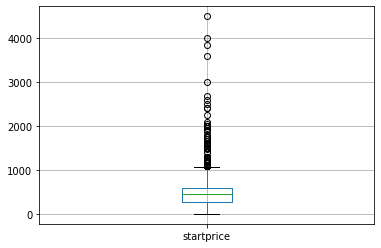

In [ ]:
df.boxplot(column='startprice')

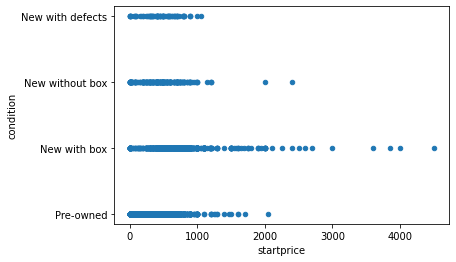

In [ ]:
df.plot.scatter(x = 'startprice', y = 'condition')

We can see that new with box are high in price, as we know new products will have high price so there is no reason to remove outliers 

(array([ 42., 241., 264., 758., 413., 827., 695., 235., 218.,  35.]),
 array([ 4. ,  4.8,  5.6,  6.4,  7.2,  8. ,  8.8,  9.6, 10.4, 11.2, 12. ]),
 <a list of 10 Patch objects>)

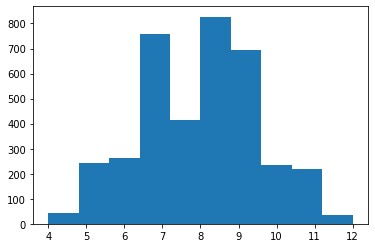

In [ ]:
plt.hist(df['size'])

almost normal imputing mean

In [ ]:
df['size'].fillna((df['size'].mean()), inplace=True)

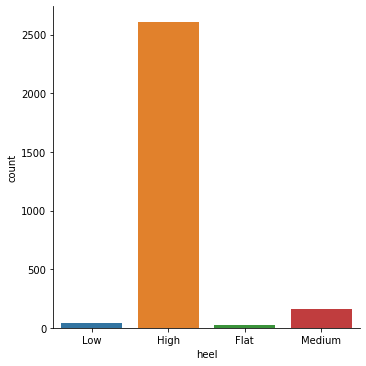

In [ ]:
sns.catplot(x = 'heel', kind = 'count', data = df)

In [ ]:
df['heel'].value_counts()

High      2610
Medium     163
Low         38
Flat        24
Name: heel, dtype: int64

Random imputation of missing values

In [ ]:
p = df.heel.value_counts(normalize=True)
m = df.heel.isnull()

np.random.seed(42)
rand_fill = np.random.choice(p.index, size=m.sum(), p=p)
df.loc[m, 'heel'] = rand_fill

In [ ]:
df.isnull().sum()

biddable      0
sold          0
startprice    0
condition     0
size          0
heel          0
style         0
color         0
material      0
dtype: int64

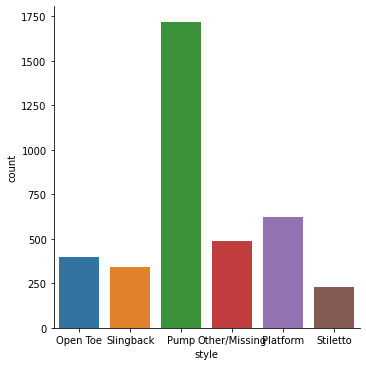

In [ ]:
df['style'].value_counts()
sns.catplot(x = 'style', kind = 'count', data = df)

Other/Missing    1689
Black            1330
Beige             411
Red               192
Brown             174
Name: color, dtype: int64

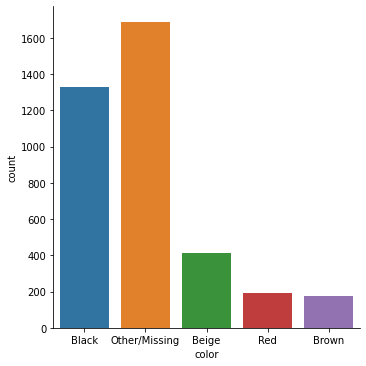

In [ ]:
sns.catplot(x = 'color', kind = 'count', data = df)
df['color'].value_counts()

Other/Missing     1172
Leather            975
Patent Leather     928
Suede              450
Satin              158
Snakeskin          113
Name: material, dtype: int64

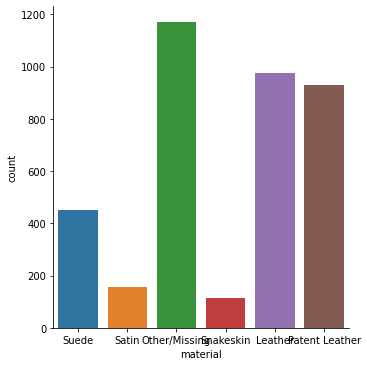

In [ ]:
sns.catplot(x = 'material', kind = 'count', data = df)
df['material'].value_counts()

Pre-owned           2367
New with box        1092
New without box      257
New with defects      80
Name: condition, dtype: int64

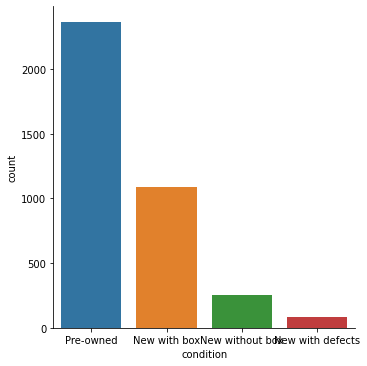

In [ ]:
sns.catplot(x = 'condition', kind = 'count', data = df)
df['condition'].value_counts()

1    2244
0    1552
Name: biddable, dtype: int64

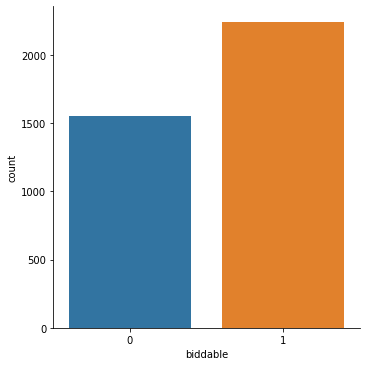

In [ ]:
sns.catplot(x = 'biddable', kind = 'count', data = df)
df['biddable'].value_counts()

0    2997
1     799
Name: sold, dtype: int64

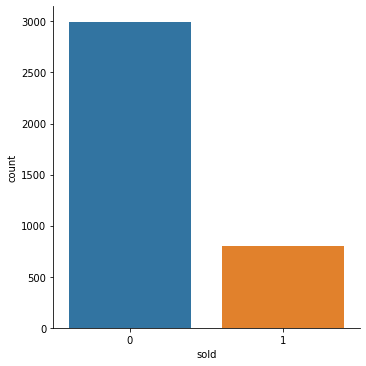

In [ ]:
sns.catplot(x = 'sold', kind = 'count', data = df)
df['sold'].value_counts()

From the last 2 graphs we can say that, even though more than 2000 products are biddle, the products sold are only around 750

In [ ]:
df = pd.get_dummies(df, columns=['condition','heel','style','color','material'])
df.head()

In [ ]:
df.corr()

,biddable,sold,startprice,size,condition_New with box,condition_New with defects,condition_New without box,condition_Pre-owned,heel_Flat,heel_High,heel_Low,heel_Medium,style_Open Toe,style_Other/Missing,style_Platform,style_Pump,style_Slingback,style_Stiletto,color_Beige,color_Black,color_Brown,color_Other/Missing,color_Red,material_Leather,material_Other/Missing,material_Patent Leather,material_Satin,material_Snakeskin,material_Suede
biddable,1.000000,0.099469,-0.191328,0.001031,-0.114271,-0.001089,-0.046763,0.131339,-0.003458,-0.020739,0.005810,0.022299,0.030999,0.007540,-0.016930,-0.028187,-0.005938,0.041922,-0.027527,-0.032828,-0.012452,0.052349,0.003667,-0.018851,0.065156,-0.034395,-0.001077,-0.015134,-0.013289
sold,0.099469,1.000000,-0.257331,0.019288,-0.071163,0.014223,0.002329,0.061065,0.000804,0.001353,-0.033053,0.014520,-0.020615,0.055517,-0.041764,0.011914,-0.042851,0.040167,0.017659,0.050192,-0.023559,-0.051375,0.004680,0.014462,-0.013552,0.017548,-0.029950,-0.021997,0.006561
startprice,-0.191328,-0.257331,1.000000,0.031175,0.410073,-0.007161,-0.000744,-0.380634,-0.027591,0.124067,-0.048491,-0.108995,-0.023292,-0.089953,-0.077560,0.143122,-0.068931,0.060456,0.026097,0.023828,-0.074825,-0.006651,-0.002388,0.031002,-0.039982,0.030409,-0.067373,0.076948,-0.024018
size,0.001031,0.019288,0.031175,1.000000,0.028384,0.011266,-0.035859,-0.011265,-0.009334,0.039133,-0.029307,-0.027208,0.019247,-0.026183,-0.006719,0.003601,0.010401,0.002388,0.069548,0.008556,-0.024648,-0.040216,-0.002517,0.003313,-0.049766,0.035166,0.020731,0.004078,0.004938
condition_New with box,-0.114271,-0.071163,0.410073,0.028384,1.000000,-0.093243,-0.171251,-0.817883,-0.000373,0.055649,-0.004801,-0.061661,-0.033230,-0.043209,-0.061209,0.108135,-0.029235,0.007634,-0.000436,-0.027571,-0.022414,0.014197,0.049839,-0.003303,-0.029163,0.043387,-0.033368,0.008537,0.004587
condition_New with defects,-0.001089,0.014223,-0.007161,0.011266,-0.093243,1.000000,-0.039540,-0.188838,-0.012648,0.022804,-0.017292,-0.013120,-0.020282,-0.006820,-0.010448,0.036007,-0.001330,-0.021770,0.019704,-0.003958,-0.014620,-0.005888,0.007981,-0.002300,-0.022628,0.018959,0.015337,-0.025701,0.014277
condition_New without box,-0.046763,0.002329,-0.000744,-0.035859,-0.171251,-0.039540,1.000000,-0.346824,0.025787,-0.009895,-0.031759,0.017740,-0.023773,0.025409,0.008184,-0.007123,-0.000565,-0.002219,-0.002787,-0.061638,0.031185,0.049900,-0.004780,0.019176,0.006020,-0.043497,0.006840,0.039176,-0.001513
condition_Pre-owned,0.131339,0.061065,-0.380634,-0.011265,-0.817883,-0.188838,-0.346824,1.000000,-0.009274,-0.053623,0.026080,0.052302,0.049388,0.029218,0.056043,-0.108015,0.028003,0.000472,-0.003989,0.058896,0.009105,-0.037395,-0.046453,-0.006176,0.030834,-0.023602,0.023083,-0.020672,-0.007734
heel_Flat,-0.003458,0.000804,-0.027591,-0.009334,-0.000373,-0.012648,0.025787,-0.009274,1.000000,-0.293212,-0.010159,-0.021484,0.000646,0.132825,-0.021526,-0.047498,-0.027125,-0.021842,-0.020129,0.027036,-0.004173,-0.015230,0.008201,-0.001351,-0.010962,0.001110,-0.017965,0.021132,0.016007
heel_High,-0.020739,0.001353,0.124067,0.039133,0.055649,0.022804,-0.009895,-0.053623,-0.293212,1.000000,-0.400859,-0.847729,0.033886,-0.137915,0.024945,0.032776,0.021110,0.017249,0.017852,-0.033033,-0.028660,0.037949,-0.012105,-0.012103,0.002616,0.031325,-0.021592,0.017127,-0.024692


In [ ]:
X = df.drop('sold',1)
X.head()

,biddable,startprice,condition,size,heel,style,color,material
0,1,199.00,Pre-owned,9.5,Low,Open Toe,Black,Suede
1,0,375.00,New with box,7.5,High,Slingback,Other/Missing,Satin
2,1,299.99,Pre-owned,8.5,High,Pump,Black,Other/Missing
3,1,49.99,Pre-owned,8.5,High,Pump,Black,Snakeskin
4,0,89.00,Pre-owned,5.5,Flat,Other/Missing,Other/Missing,Leather


In [ ]:
y = df[['sold']]
y.head()

,sold
0,0
1,0
2,1
3,1
4,0
